# **Loading necessery libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **Loading the data set**

In [2]:
df = pd.read_csv('titanic_data.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Data Dictionary
Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex
Age	Age in years
sibsp	# of siblings / spouses aboard the Titanic
parch	# of parents / children aboard the Titanic
ticket	Ticket number
fare	Passenger fare
cabin	Cabin number
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower
age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)
parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.shape

(891, 12)

# Categorical : Sex, Embarked
# Continuous : Age, Fare
# Discrete : SibSp, Parch
# Alphanumeric : Cabin

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **Importing all the classifier libraries discussed till now!**

In [8]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# **Numerical Data Analysis**

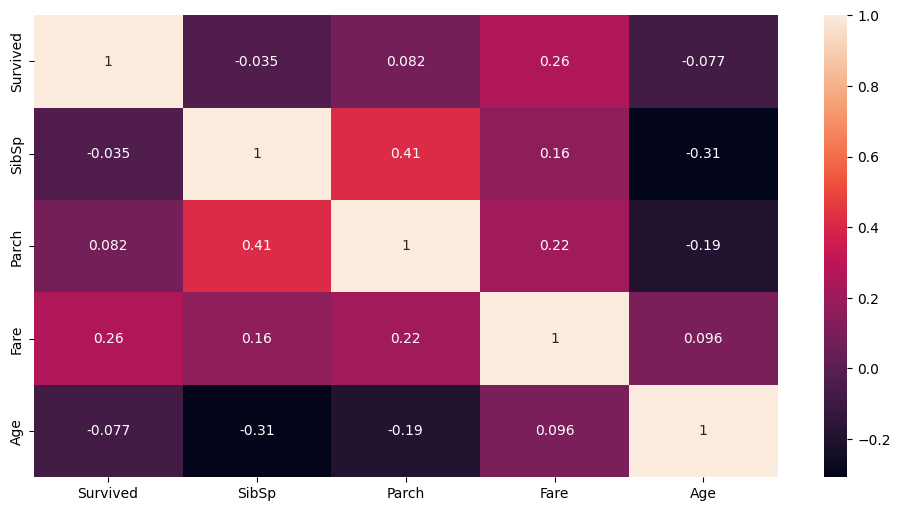

In [9]:
plt.figure(figsize = (12, 6))
heatmap = sns.heatmap(df[['Survived', 'SibSp', 'Parch', 'Fare', 'Age']].corr(), annot = True)
plt.show()

# survived with age is showing having very less corr but that's not true,
# because in the movie, we saw children and women are prioritized during the rescue operation

# **SibSp - No of siblings / spouses abroad the RMS Titanic**

Text(0, 0.5, 'Survival Probability')

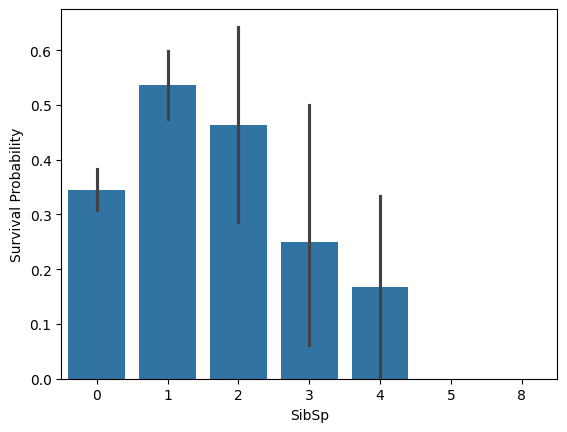

In [10]:
sns.barplot(x = 'SibSp', y = 'Survived', data = df).set_ylabel('Survival Probability')
# passengers having 1 or 2 siblings have the more survival chance rather than being single or having more than 2 siblings

# **Age**

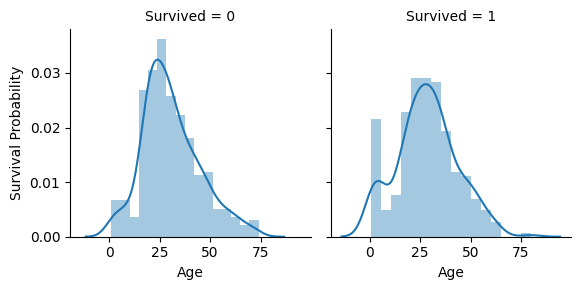

In [11]:
age_visual = sns.FacetGrid(df, col = 'Survived')
age_visual = age_visual.map(sns.distplot, 'Age').set_ylabels('Survival Probability')
age_visual

# very young ppl has more tendency of survival rather than old ppl

# **Sex**

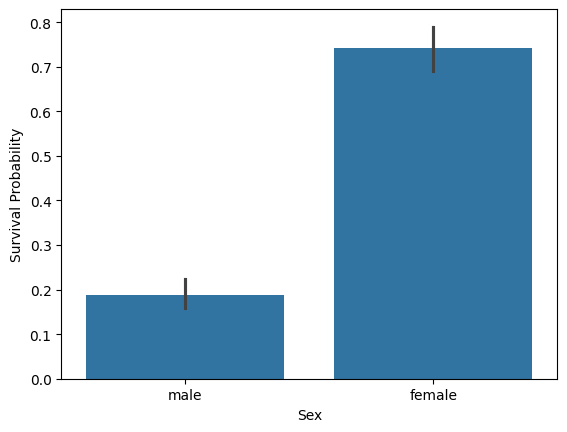

In [12]:
sex_plot = sns.barplot(x = 'Sex', y = 'Survived', data = df).set_ylabel('Survival Probability')

# females have highers probability of survival

In [13]:
df[['Sex', 'Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


# **Pclass - First, Second, Third Class Passengers**

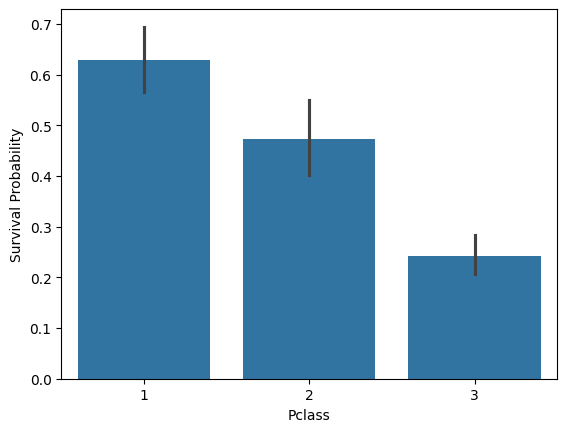

In [14]:
pclass_plot = sns.barplot(x = 'Pclass', y = 'Survived', data = df).set_ylabel('Survival Probability')

# first class passengers were the first priority in case of evacuation

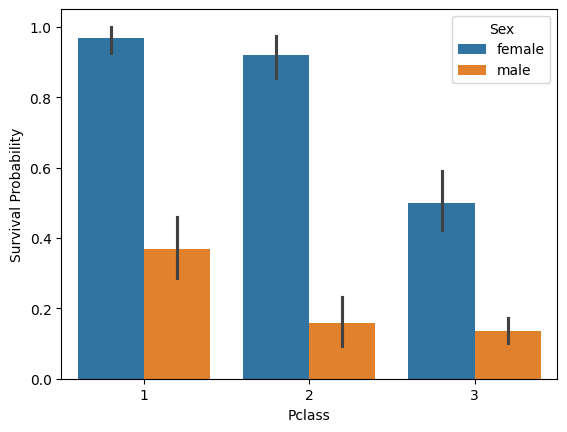

In [15]:
pclass_plot = sns.barplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = df).set_ylabel('Survival Probability')

# first class females were the first priority in case of evacuation

In [16]:
df[['Pclass', 'Survived']].groupby('Pclass').mean()
# Survival rate %
# first class - 63.0%
# second class - 47.3%
# third class - 24.2%

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


# **Embarked - Boarding Port (C = Cherbourg, Q = Queenstown, S = Southampton)**

In [17]:
df['Embarked'].value_counts()

# majority of the passengers were from Southampton

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [18]:
df['Embarked'].isnull().sum()

# handling the 2 null values by adding 'S' to these. As 'S' is the majority here

2

In [19]:
df['Embarked'] = df['Embarked'].fillna('S')

In [20]:
df['Embarked'].isnull().sum()

0

Text(0, 0.5, 'Survival Probability')

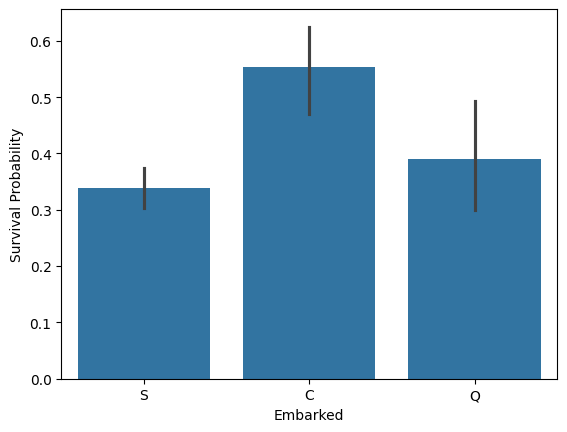

In [21]:
sns.barplot(x = 'Embarked', y = 'Survived', data = df).set_ylabel('Survival Probability')

# ppl boarded from Cherbourg had the higher survival rate
# but this should not be true like in a accident, how the boarding station would matter at all! Let's analyze further

# **pclass vs embarked (ticket class vs boarding port)**

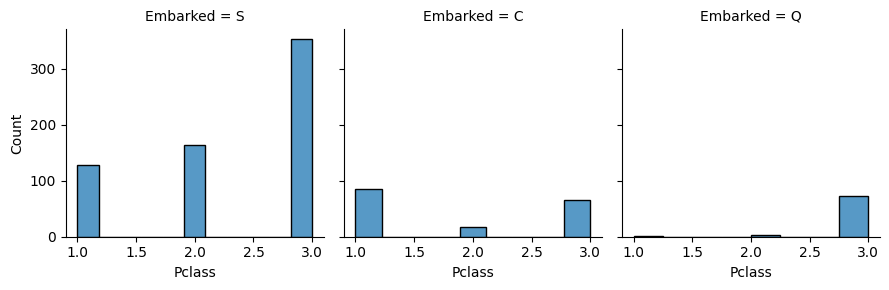

In [22]:
embarked_visual = sns.FacetGrid(df, col = 'Embarked')
embarked_visual = embarked_visual.map(sns.histplot, 'Pclass')
embarked_visual

# Southampton has the third class passengers most, so survival rate is less
# Cherbourg has first class passengers most, so survival rate is high
# Queenstown has third class passengers most, so survival rate is less

# **Sex vs embarked**

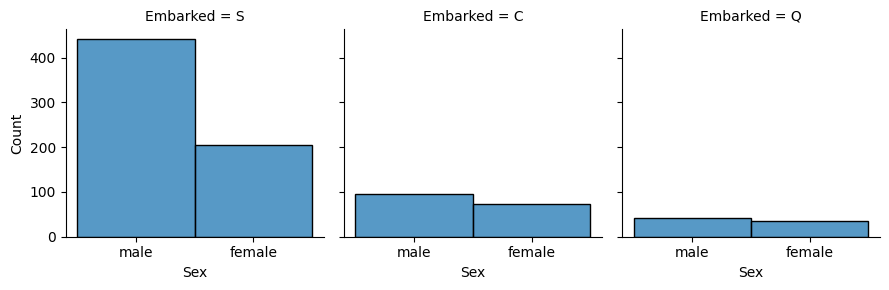

In [23]:
sex_visual = sns.FacetGrid(df, col = 'Embarked')
sex_visual = sex_visual.map(sns.histplot, 'Sex')
sex_visual

# most passengers were from Southampton (mostly were male & third class)
# Southampton has more males than females (most of them from third class), so overall survival rate was least among all
# Cherbourg had equal male & female passengers (most of them from first class), so overall survival rate was highest among all
# Queenstown also has equal males & females but most of them were from third class, so overall survival rate was comparatively more than Southampton

In [24]:
data = pd.read_csv('titanic_data.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
mean = data["Age"].mean()
std = data["Age"].std()
is_null = data["Age"].isnull().sum()

# compute random numbers between the mean, std and is_null
rand_age = np.random.randint(mean - std, mean + std, size = is_null)

# fill NaN values in Age column with random values generated
age_slice = data["Age"].copy()
age_slice[np.isnan(age_slice)] = rand_age
data["Age"] = age_slice

In [26]:
data["Age"].isnull().sum()

0

In [27]:
data["Embarked"].isnull().sum()

2

In [28]:
#Fill Embarked with 'S' i.e. the most frequent values
data["Embarked"] = data["Embarked"].fillna("S")

In [29]:
col_to_drop = ['PassengerId','Cabin', 'Ticket','Name']
data.drop(col_to_drop, axis=1, inplace = True)

In [30]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [31]:
genders = {"male": 0, "female": 1}
data['Sex'] = data['Sex'].map(genders)

In [32]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [33]:
ports = {"S": 0, "C": 1, "Q": 2}
data['Embarked'] = data['Embarked'].map(ports)

In [34]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


# **<font color = 'green'>Splitting the data</font>**

In [35]:
# input and output data

x = data.drop(data.columns[[0]], axis = 1)
y = data['Survived']

In [36]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0


In [37]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [38]:
# splitting into training and testing data
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.30, random_state =0)

# **Feature Scalling**

In [39]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)

# **Classification**

In [40]:
logreg = LogisticRegression()
svc_classifier = SVC()
dt_classifier = DecisionTreeClassifier()
knn_classifier = KNeighborsClassifier(5)
rf_classifier = RandomForestClassifier(n_estimators=1000, criterion = 'entropy', random_state = 0 )

In [41]:
logreg.fit(xtrain, ytrain)
svc_classifier.fit(xtrain, ytrain)
dt_classifier.fit(xtrain, ytrain)
knn_classifier.fit(xtrain, ytrain)
rf_classifier.fit(xtrain, ytrain)

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=0)

In [42]:
logreg_ypred = logreg.predict(xtest)
svc_classifier_ypred = svc_classifier.predict(xtest)
dt_classifier_ypred = dt_classifier.predict(xtest)
knn_classifier_ypred = knn_classifier.predict(xtest)
rf_classifier_ypred = rf_classifier.predict(xtest)

In [45]:
# finding accuracy

from sklearn.metrics import accuracy_score

logreg_acc = accuracy_score(ytest, logreg_ypred)
svc_classifier_acc = accuracy_score(ytest, svc_classifier_ypred)
dt_classifier_acc = accuracy_score(ytest, dt_classifier_ypred)
knn_classifier_acc = accuracy_score(ytest, knn_classifier_ypred)
rf_classifier_acc = accuracy_score(ytest, rf_classifier_ypred)

In [46]:
print ("Logistic Regression : ", round(logreg_acc*100, 2))
print ("Support Vector      : ", round(svc_classifier_acc*100, 2))
print ("Decision Tree       : ", round(dt_classifier_acc*100, 2))
print ("K-NN Classifier     : ", round(knn_classifier_acc*100, 2))
print ("Random Forest       : ", round(rf_classifier_acc*100, 2))

Logistic Regression :  81.34
Support Vector      :  81.72
Decision Tree       :  77.99
K-NN Classifier     :  80.97
Random Forest       :  83.58
